<h1 style="color:purple">Practicle:3 Linear Regression + Error Detection </h1>
<h3 style="color:purple">2021BIT023<br>Vaibhav Lanjewar</h3>


 ## Use case : We have to predict the salary using experience by using linear regresion  

### Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [4]:
df.tail(2)

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             3
dtype: int64

In [6]:
df.notnull().sum()

YearsExperience    30
Salary             27
dtype: int64

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             3
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.corr() # correlation

,YearsExperience,Salary
YearsExperience,1.00000,0.98131
Salary,0.98131,1.00000


In [10]:
X=df.iloc[:,:-1].values # independent variable 
y = df.iloc[:, -1].values # dependent variable 


In [34]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

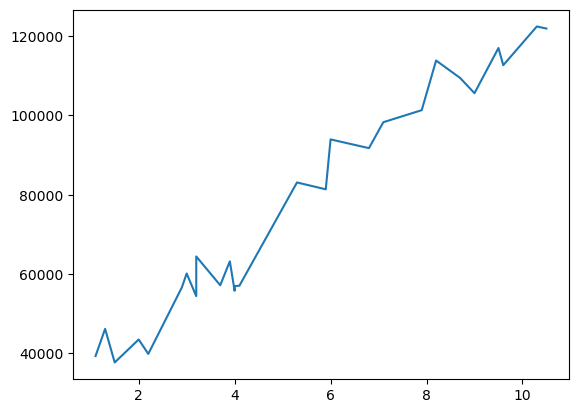

In [11]:
# graph
plt.plot(X,y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
pred = lm.predict(X_test)


In [16]:
print("y_test",y_test)
print("X_test",X_test)

y_test [ 37731. 112635.  83088.  91738.  56642.  55794.]
X_test [[1.5]
 [9.6]
 [5.3]
 [6.8]
 [2.9]
 [4. ]]


In [17]:
pred

array([ 41144.69206511, 117316.34008101,  76879.53928245,  90985.40002613,
        54310.16209255,  64654.45997125])

<h2>y=mx+c <br>
y=ax+c<h2>

In [18]:
print(lm.intercept())

AttributeError: 'LinearRegression' object has no attribute 'intercept'

In [19]:
a=lm.intercept_
c=lm.coef_

In [20]:
print(a,c)

27038.831321426056 [9403.90716246]


In [21]:
my_sal_pred=a*10+c  # prediction of salary for 10 year exp
print(my_sal_pred)

[279792.22037672]


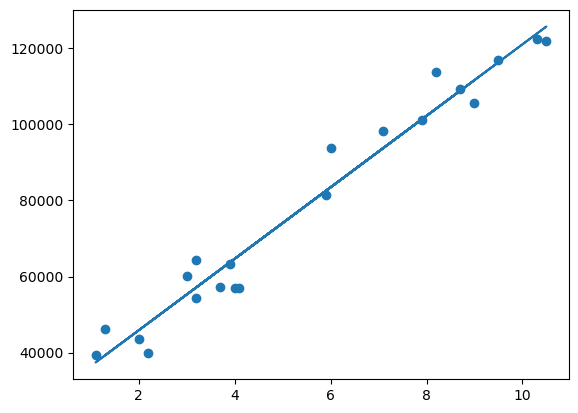

In [22]:
# graph od train and test data
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.predict(X_train))   

<h1 style="color:purple">Model Evaluation Metrix </h1>

In [23]:
from sklearn import metrics


In [24]:
print('Mean Absolute Error is : ',metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error is :  4374.731786040949


In [25]:
print('Mean Squared Error is :',metrics.mean_squared_error(y_test,pred))

Mean Squared Error is : 26104141.43339284


In [26]:
print('Root Mean Squared Error is: ',np.sqrt(metrics.mean_squared_error(y_test,pred)))

Root Mean Squared Error is:  5109.2212159381825


In [27]:
#root Mean Squared Error (RMSE)

In [28]:
train_score_lm = lm.score(X_train, y_train)
test_score_lm = lm.score(X_test, y_test)

print("Train score: ", train_score_lm)
print("Test score : ",test_score_lm)



Train score:  0.9633907320629322
Test score :  0.9591199103412812


In [ ]:
from sklearn.metrics import r2_score
print(" Root mean Squared error is:",r2_score(y_test,pred) )
r2=r2_score(y_test,pred)

<h1 style="color:purple">Pracricle:4  <br> Multiple Linear Regression</h1>

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
col_transf = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [])], remainder='passthrough')
X = np.array(col_transf.fit_transform(X))

In [33]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [35]:
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [36]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(Xm_train, ym_train)

LinearRegression()

In [37]:
ym = lm1.predict(Xm_test)
np.set_printoptions(precision=2)
print(np.concatenate((ym.reshape(len(ym),1), ym_test.reshape(len(ym_test),1)),1))

[[ 64179.34  63218.  ]
 [113452.36 105582.  ]
 [127944.42 121872.  ]
 [ 84468.23  93940.  ]
 [ 66111.61  57081.  ]
 [119249.19 112635.  ]
 [ 57416.37  54445.  ]
 [ 62247.06  57189.  ]
 [118283.05 116969.  ]]
